# The 2018 Midterms

## Context

### Recent Presidential Elections

#### Setting Up the DataFrame

In [111]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [112]:
elec2018 = pd.read_csv('../Datasets/2018-elections/election-context-2018.csv').set_index(['state', 'county'])
elec2018 = elec2018.drop(columns='fips')
elec2018['age30to65_pct'] = abs(elec2018['age29andunder_pct'] - elec2018['age65andolder_pct'])
elec2018.head()

trump16  clinton16  otherpres16  romney12  obama12  \
state   county                                                        
Alabama Autauga    18172       5936          865     17379     6363   
        Baldwin    72883      18458         3874     66016    18424   
        Barbour     5454       4871          144      5550     5912   
        Bibb        6738       1874          207      6132     2202   
        Blount     22859       2156          573     20757     2970   

                 otherpres12  demsen16  repsen16  othersen16  demhouse16  \
state   county                                                             
Alabama Autauga          190    6331.0   18220.0        62.0      7544.0   
        Baldwin          898   19145.0   74021.0       248.0         0.0   
        Barbour           47    4777.0    5436.0        16.0      5297.0   
        Bibb              86    2082.0    6612.0        17.0      1971.0   
        Blount           279    2980.0   22169.0        48.0      2390.0   

                     ...        age65andolder_pct  median_hh_inc  \
state   county       ...                                           
Alabama Autauga      ...                13.978456        53099.0   
        Baldwin      ...                18.714851        51365.0   
        Barbour      ...                16.528895        33956.0   
        Bibb         ...                14.885699        39776.0   
        Blount       ...                17.192916        46212.0   

                 clf_unemploy_pct  lesshs_pct  lesscollege_pct  \
state   county                                                   
Alabama Autauga          5.591657   12.417046        75.407229   
        Baldwin          6.286843    9.972418        70.452889   
        Barbour         12.824738   26.235928        87.132213   
        Bibb             7.146827   19.301587        88.000000   
        Blount           5.953833   19.968585        86.950243   

                 lesshs_whites_pct  lesscollege_whites_pct  rural_pct  \
state   county                                                          
Alabama Autauga          10.002112               74.065601  42.002162   
        Baldwin           7.842227               68.405607  42.279099   
        Barbour          19.579752               81.364746  67.789635   
        Bibb             15.020490               87.471774  68.352607   
        Blount           16.643368               86.163610  89.951502   

                 ruralurban_cc  age30to65_pct  
state   county                                 
Alabama Autauga            2.0      26.058602  
        Baldwin            3.0      16.759561  
        Barbour            6.0      21.135493  
        Bibb               1.0      22.443736  
        Blount             1.0      20.047137  

[5 rows x 37 columns]

##### What Statistics Do We Have?
What kind of contextual information do we have here? Let's list the column labels and their respective indexes. (Note that I've cheated a bit and limited the list to make it managabe; everything after the 19th index is the same `pop_stats` slice.)

In [113]:
list(enumerate(elec2018.columns))[:20]

[(0, 'trump16'),
 (1, 'clinton16'),
 (2, 'otherpres16'),
 (3, 'romney12'),
 (4, 'obama12'),
 (5, 'otherpres12'),
 (6, 'demsen16'),
 (7, 'repsen16'),
 (8, 'othersen16'),
 (9, 'demhouse16'),
 (10, 'rephouse16'),
 (11, 'otherhouse16'),
 (12, 'demgov16'),
 (13, 'repgov16'),
 (14, 'othergov16'),
 (15, 'repgov14'),
 (16, 'demgov14'),
 (17, 'othergov14'),
 (18, 'total_population'),
 (19, 'cvap')]

##### Some Useful Index Slices

In [114]:
# All presidential slices
pres = elec2018.columns[0:6]
pres16 = pres[:3]
pres12 = pres[3:]

# All congressional slices
congress = elec2018.columns[6:12]
senate = congress[:3]
house = congress[3:]

# All gubernatorial slices
gov = elec2018.columns[12:18]
gov16 = gov[:3]
gov14 = gov[3:]

# Partisan slices
dem = [ind for ind in elec2018.columns if 'dem' in ind] + ['clinton16', 'obama12']
rep = [ind for ind in elec2018.columns if 'rep' in ind] + ['trump16', 'romney12']

# Population slices
pop_stats = elec2018.columns[18:]

#### Interesting Constituencies

##### Flip Counties

###### Romney-Clinton Counties

In [115]:
rom_clin = elec2018[(elec2018['clinton16'] > elec2018['trump16'])
                    & (elec2018['romney12'] > elec2018['obama12'])]
rom_clin.loc[:, pres].head()

trump16  clinton16  otherpres16  romney12  obama12  \
state      county                                                         
California Nevada      23365      26053         5517     24986    24663   
           Orange     507148     609961        80412    582332   512440   
Georgia    Cobb       152912     160121        17786    171722   133124   
           Gwinnett   146989     166153        15189    159855   132509   
           Henry       45724      50057         2985     46774    43761   

                     otherpres12  
state      county                 
California Nevada           2027  
           Orange          27892  
Georgia    Cobb             5270  
           Gwinnett         4364  
           Henry             843

In [116]:
len(rom_clin)

18

###### Obama-Trump Counties

In [117]:
obama_trump = elec2018[(elec2018['clinton16'] < elec2018['trump16'])
                    & (elec2018['romney12'] < elec2018['obama12'])]
obama_trump.loc[:, pres].head()

trump16  clinton16  otherpres16  romney12  obama12  \
state    county                                                         
Alabama  Barbour      5454       4871          144      5550     5912   
         Conecuh      3420       3080           85      3439     3555   
Arkansas Woodruff     1347       1118          106      1227     1340   
Colorado Chaffee      5391       4888          971      5070     5086   
         Conejos      1914       1771          337      1835     2213   

                   otherpres12  
state    county                 
Alabama  Barbour            47  
         Conecuh            28  
Arkansas Woodruff          118  
Colorado Chaffee           306  
         Conejos            53

In [118]:
len(obama_trump)

223

###### All "Flip" Counties

In [119]:
flips = rom_clin.append(obama_trump, sort=True)
flips.loc[:, pres].head()

trump16  clinton16  otherpres16  romney12  obama12  \
state      county                                                         
California Nevada      23365      26053         5517     24986    24663   
           Orange     507148     609961        80412    582332   512440   
Georgia    Cobb       152912     160121        17786    171722   133124   
           Gwinnett   146989     166153        15189    159855   132509   
           Henry       45724      50057         2985     46774    43761   

                     otherpres12  
state      county                 
California Nevada           2027  
           Orange          27892  
Georgia    Cobb             5270  
           Gwinnett         4364  
           Henry             843

In [120]:
# We expect this number to be 223 + 18
len(flips)

241

###### Largest Flips in the Nations
Let's find which counties showed the change relative to the size of their electorate. First we'll need to get a sum of the entire electorate in these counties. To do this we will get the sum of all three presidential columns for each election. Recall that this includes third party candidates.

In [121]:
rom_clin16 = rom_clin.loc[:, pres16].sum(1)
rom_clin12 = rom_clin.loc[:, pres12].sum(1)
rom_clin12.head()

state       county  
California  Nevada        51676
            Orange      1122664
Georgia     Cobb         310116
            Gwinnett     296728
            Henry         91378
dtype: int64

In [122]:
obama_trump16 = obama_trump.loc[:, pres16].sum(1)
obama_trump12 = obama_trump.loc[:, pres12].sum(1)
obama_trump12.head()

state     county  
Alabama   Barbour     11509
          Conecuh      7022
Arkansas  Woodruff     2685
Colorado  Chaffee     10462
          Conejos      4101
dtype: int64

###### Relative Differences
We get the relative differences by taking the percentage of the votes of each electorate the candidates earned and subtracting those two numbers. Because we have third party candidates, there is a difference between the voters who went _away_ from one party and the candidates who went _to_ another. This is illustrated below. If we had only summated the votes from the two major parties, the two lists below would be identical. Bear in mind that `clinton_loss` is sort in ascending order because the relevant counties are ones where she _underperformed_ her predecessor, whereas `trump_gain` is sorted in descending order because we are concerned with places where he _outperformed_ his predecessor.

In [123]:
clinton_loss = (obama_trump['clinton16'] / obama_trump16) - (obama_trump['obama12'] / obama_trump12)
clinton_loss.sort_values()[:10]

state         county   
Kentucky      Elliott     -0.235178
Iowa          Howard      -0.228066
Illinois      Henderson   -0.226061
Iowa          Jackson     -0.204580
              Worth       -0.203871
Vermont       Essex       -0.201660
Minnesota     Swift       -0.199805
North Dakota  Ransom      -0.198579
Iowa          Chickasaw   -0.195982
North Dakota  Sargent     -0.188104
dtype: float64

In [124]:
trump_gain = (obama_trump['trump16'] / obama_trump16) - (obama_trump['romney12'] / obama_trump12)
trump_gain.sort_values(ascending=False)[:10]

state      county    
Kentucky   Elliott       0.231163
Iowa       Howard        0.186276
Illinois   Henderson     0.180669
New York   Oswego        0.179756
Iowa       Worth         0.158202
           Jackson       0.157058
New York   Franklin      0.156666
Minnesota  Swift         0.154164
New York   Montgomery    0.150676
           Cayuga        0.150416
dtype: float64

In [125]:
clinton_gain = (rom_clin['clinton16'] / rom_clin16 - (rom_clin['obama12'] / rom_clin12))
clinton_gain.sort_values(ascending=False)[:10]

state         county    
Pennsylvania  Lackawanna    0.144509
Georgia       Gwinnett      0.059486
              Cobb          0.054742
Texas         Fort Bend     0.053123
California    Orange        0.052903
Utah          Summit        0.047268
Texas         Kenedy        0.041240
Utah          Salt Lake     0.037068
Pennsylvania  Chester       0.033740
Georgia       Henry         0.027923
dtype: float64

In [126]:
trump_loss = (rom_clin['trump16'] / rom_clin16) - (rom_clin['romney12'] / rom_clin12)
trump_loss.sort_values()[:10]

state         county    
Utah          Salt Lake    -0.256639
Pennsylvania  Lackawanna   -0.163226
Utah          Summit       -0.152742
California    Orange       -0.095207
Georgia       Cobb         -0.091512
              Gwinnett     -0.091040
Texas         Fort Bend    -0.081512
Washington    Whitman      -0.069080
Montana       Gallatin     -0.066449
Pennsylvania  Chester      -0.063478
dtype: float64

In [127]:
for frame in [clinton_gain, clinton_loss, trump_gain, trump_loss]:
    print(frame.mean())

0.026546155155501665
-0.11420996928000063
0.07882622839072226
-0.0832015734032821


Third Party Gains

In [128]:
total_tp_elec = flips.loc[:, pres16].sum(1)
tp_gain = (flips['otherpres16'] / total_tp_elec) - (flips['otherpres12'] / total_tp_elec)
tp_gain.sort_values(ascending=False).head()

state         county   
Utah          Salt Lake    0.222316
              Summit       0.110121
Vermont       Essex        0.104274
North Dakota  Ransom       0.100890
              Benson       0.092491
dtype: float64

In [129]:
tp_gain.sort_values().head()

state     county    
New York  Montgomery   -0.045975
          Niagara      -0.044761
          Suffolk      -0.042199
          Rensselaer   -0.036262
          Richmond     -0.034903
dtype: float64

It seems that third parties (and in particular Even McMullen in Utah) were the real winners in 2016. Even among major parties, notice that there is enough difference for counties to move up and down in the sorted lists.

In [130]:
(trump_gain - clinton_loss).sort_values(ascending=False).head()

state     county   
Kentucky  Elliott      0.466341
Iowa      Howard       0.414342
Illinois  Henderson    0.406730
Iowa      Worth        0.362073
          Jackson      0.361638
dtype: float64

In [131]:
(clinton_loss - trump_gain).sort_values(ascending=False).head()

state           county      
North Carolina  Nash           -0.011475
New Hampshire   Hillsborough   -0.013221
Texas           Jefferson      -0.020872
Virginia        Chesapeake     -0.023032
Washington      Clallam        -0.032066
dtype: float64

###### Visualizing Flip Counties

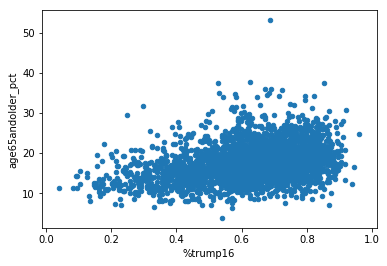

In [133]:
%matplotlib inline
columns_to_keep = ['trump2016', 'clint2016',
                   'age29andunder_pct', 'age30to64_pct',
                   'age65andolder_pct']

for column in pres16:
    elec2018['%' + column] = elec2018[column] / elec2018.loc[:, pres16].sum(1)
    
elec2018.plot.scatter(x='%trump16', y='age65andolder_pct')

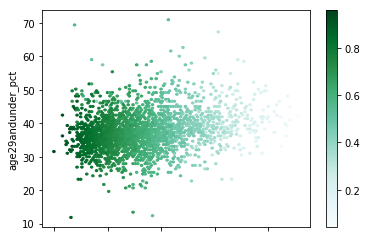

In [187]:
elec2018.plot.hexbin(x='%clinton16', y='age29andunder_pct', C='%trump16')

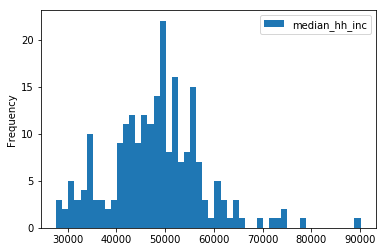

In [135]:
obama_trump.plot.hist(y='median_hh_inc', bins=50)

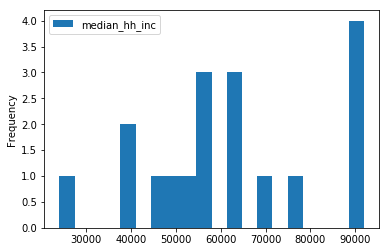

In [136]:
rom_clin.plot.hist(y='median_hh_inc', bins=20)

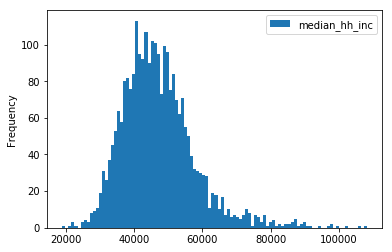

In [137]:
trump16 = elec2018[elec2018['trump16'] > elec2018['clinton16']]
trump16.plot.hist(y='median_hh_inc', bins=100)

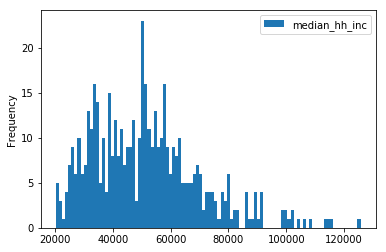

In [138]:
clinton16 = elec2018[elec2018['clinton16'] > elec2018['trump16']]
clinton16.plot.hist(y='median_hh_inc', bins=100)

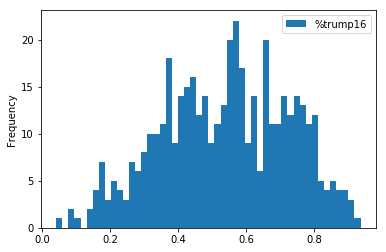

In [139]:
elec2018[(elec2018['median_hh_inc'] > elec2018['median_hh_inc'].mean())
         & (elec2018['nonwhite_pct'] > elec2018['nonwhite_pct'].mean())].plot.hist(y='%trump16', bins=50)

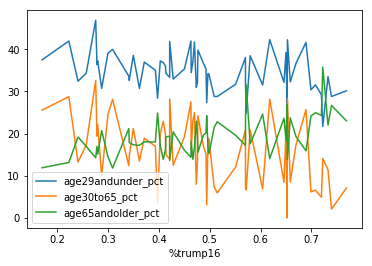

In [200]:
age_bins = ['age29andunder_pct', 'age30to65_pct', 'age65andolder_pct']
elec2018.reset_index().set_index('%trump16').sort_index().dropna().loc[:, age_bins].plot()